# Milk Quality Prediction

### This dataset is manually collected from observations. It helps us to build machine leaming models to predict the quality of milk.

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.metrics import accuracy_score 
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree 
import warnings 
warnings.filterwarnings('ignore')

#### The code begins by importing necessary libraries for data analysis and machine learning. It includes pandas for data manipulation, numpy for numerical operations, matplotlib for plotting, seabom for data visualization, and various classes and functions from scikit-learn for machine leaming tasks.

## DATA COLLECTION

In [2]:
df=pd.read_csv('milknew (1).csv')
df.head()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium


### Understanding Given Data

This dataset consists of 7 independent variables ie pH, Temperature, Taste, Odor, Fat, Turbidity, and Color.
1.pH - The •pH V calumn contains 1059 non-null float values. It represents the acidity or alkalinity of the milk samples

2.Temprature - Tne 'Temperature column contains 1059 non-null integer values. It represents tne temperature at wntcn tne milk samples were taen

3.Taste - The Tastel column contains 1059 non-null integer values_lt appears to be a binary categorical feature, where 1 likely indicates a positive taste, and 0 indicates a negative taste for the milk samples.

4.octor - Tne 'Odor column contains 1059 non-null Integer values. Similar to Taster, it appears to De a binary categoncal teature, wnere 1 IIGIY jncncates tne presence ot Odor, and 0 indicates no ocor in tne milk samp•es_

5.Fat - The 'Fat column contains 1059 non-null integer values. It is a binary categorical feature, where 1 likely represents high fat content and O represents low fat content in the milk samples

6.TurblClty - Tne 'Turbidity• column contans 1059 non-null integer values. It appears to oe a binary categoncal teature, wnere 1 likely Indicates njgn turbidity' (cloudiness or opacity), and O indicates low turbidity in the milk samples.

7.Colour - The 'Colour column contains 1059 non-null integer values. It represents the color intensity of the milk samples, and since it is numerical, it is expected to oe a continuous teature.

8.Grace - Tne 'Gracev column contains 1059 non-null Object (stnng) values. It is tne target variable representing tne grace or quality ot tne milk samples.

There are no null values in Dataset

Generally, the Grade or Quality at the milk depends on these parameters. These parameters play a vital role in the predictive analysis of the milk.

## ANALYZING THE DATA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [4]:
df.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


#### From above table we get 5 number summary of dataset i.e. we get minimum, mean,median,standard deviation and maximum

## DATA CLEANING

### Analyzing the target Column

In [5]:
df['Grade'].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

#### Here, we can see data in target column is balanced

### Checking for missing values

In [6]:
df.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

#### There are no missing values in any of the columns of the dataset.

## Visualization

## 1)	Pie Chart

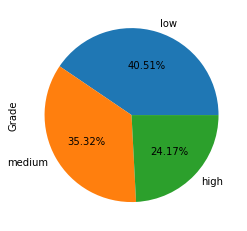

In [7]:
 plt.figure(figsize=(4,4))
df['Grade'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()


#### Here we have plotted pie chart where we have shown percentage of Grade of Milk Quality, here low quality grade is maximum and high quality is minimum

## 2) Heatmap

In [8]:
corr =  df.corr() 

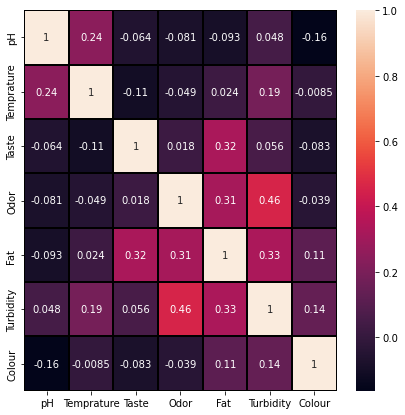

In [9]:
plt.figure(figsize=(7,7))
sns.heatmap(corr,annot=True,cmap='rocket',linecolor='black',linewidths=0.2)
plt.show()

#### here we have found the relation between various features using heatmap

## 3) Hotplot

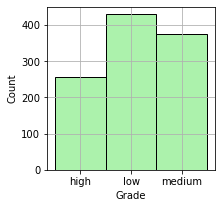

In [10]:
#hisplot (categorical)
plt.figure(figsize=(3,3))
sns.histplot(data=df,x='Grade',color='lightgreen')
plt.grid()
plt.show()

#### Here we have plotted Histplot where we have shown percentage of Grade of Milk Quality, here low quality grade is maximum and high quality is minimum

## Encoding

In [11]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['Grade']=le.fit_transform(df['Grade'])
df['Grade']

0       0
1       0
2       1
3       1
4       2
       ..
1054    2
1055    0
1056    1
1057    0
1058    1
Name: Grade, Length: 1059, dtype: int32

#### By applying Label Encoding to the 'Grade' column, the categorical labels 'high', 'medium', and 'low' have been replaced with numerical representations.

## Splitting Features and Target

In [12]:
x = df.iloc[:,:-1]
y = df['Grade']

#### splitting the DataFrame into two parts - features (x) and the target (y).

## Scaling

In [13]:
from sklearn.preprocessing import StandardScaler 
ss=StandardScaler()
x.iloc[:,:]=ss.fit_transform(x.iloc[:,:])

#### Using the StandardScaler from scikit-leam to standardize the numerical features in the DataFrame x.

## Split data into train and test

In [14]:
from sklearn.model_selection import train_test_split 
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=1)

#### Splitting the dataset into separate training and testing sets to evaluate the performance of the trained model.

## Model Building

In [15]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

#### Logistic regression model is trained on the training data and the model makes predictions on the test data to obtain the predicted target values.

## Evaluate Model

In [16]:
from sklearn.metrics import classification_report 
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.88      0.90      0.89        92
           2       0.96      0.86      0.90        76

    accuracy                           0.87       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.88      0.87      0.87       212



# HyperTunning using solver Parameter

In [17]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='liblinear')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [18]:
from sklearn.metrics import classification_report 
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.65      0.82      0.73        44
           1       0.88      0.86      0.87        92
           2       0.97      0.86      0.91        76

    accuracy                           0.85       212
   macro avg       0.83      0.84      0.83       212
weighted avg       0.86      0.85      0.85       212



In [19]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [20]:
from sklearn.metrics import classification_report 
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.88      0.90      0.89        92
           2       0.96      0.86      0.90        76

    accuracy                           0.87       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.88      0.87      0.87       212



In [26]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(solver='saga')
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [27]:
from sklearn.metrics import classification_report 
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.72      0.82      0.77        44
           1       0.88      0.90      0.89        92
           2       0.96      0.86      0.90        76

    accuracy                           0.87       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.88      0.87      0.87       212



In [31]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    ac=accuracy_score(ytest,ypred)
    cs=classification_report(ytest,ypred)
    
    print(f'accuracy_score: {ac}')
    print(f'Classification_report : {cs}')
    
    return model

#### Creating a function called mm(model) that takes a machine learning model as input, fits the model on the training data, makes predictions on the test data, and then prints the accuracy score and classification report to evaluate the model's performance on the test data.

In [32]:
svm=SVC()
dt=DecisionTreeClassifier()

#### In this step, two classifier models, Support Vector Machine (SVM) and Decision Tree, are instantiated.

## Support Vector Machine (SVM)

In [35]:
mymodel(svm)

accuracy_score: 0.9292452830188679
Classification_report :               precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       1.00      0.95      0.97        92
           2       0.90      0.91      0.90        76

    accuracy                           0.93       212
   macro avg       0.92      0.93      0.92       212
weighted avg       0.93      0.93      0.93       212



SVC()

#### mm function is called with the Support Vector Machine (SVM) model as an argument, which fits the SVM model on the training data, makes predictions on the test data, and prints the accuracy score and classification report.

I am getting accuracy of 95% from Support Vector Machine.

## HPT SVM

In [42]:
svm1 =SVC(kernel="linear")
mymodel(svm1)

accuracy_score: 0.8679245283018868
Classification_report :               precision    recall  f1-score   support

           0       0.69      0.91      0.78        44
           1       0.92      0.85      0.88        92
           2       0.96      0.87      0.91        76

    accuracy                           0.87       212
   macro avg       0.85      0.88      0.86       212
weighted avg       0.88      0.87      0.87       212



SVC(kernel='linear')

#### Rebuilding model with the 'linear' kemel and the classification report is printed



#### I am getting accuracy of 85% by using "linear" kernel in Support Vector Machine.

In [45]:
svm2=SVC(kernel="poly")
mymodel(svm2)

accuracy_score: 0.8915094339622641
Classification_report :               precision    recall  f1-score   support

           0       0.84      0.84      0.84        44
           1       0.95      0.90      0.93        92
           2       0.85      0.91      0.88        76

    accuracy                           0.89       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.89      0.89      0.89       212



SVC(kernel='poly')

#### Rebuilding model with the 'poly' kernel and the classification report is printed.

#### I am getting accuracy of 92% by using "poly" kernel in Support Vector Machine

In [46]:
svm4=SVC(kernel="rbf")
mymodel(svm4)

accuracy_score: 0.9292452830188679
Classification_report :               precision    recall  f1-score   support

           0       0.85      0.93      0.89        44
           1       1.00      0.95      0.97        92
           2       0.90      0.91      0.90        76

    accuracy                           0.93       212
   macro avg       0.92      0.93      0.92       212
weighted avg       0.93      0.93      0.93       212



SVC()

#### Rebuilding model with the 'rbf kernel and the classification report is printed.

#### I am getting accuracy of 95% by using "rbf' kernel in Support Vector Machine.

#### In Support Vector Machine "rbf" Kernel is giving us the best Accuracy

## Decision Tree

In [47]:
mymodel(dt)

accuracy_score: 1.0
Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        92
           2       1.00      1.00      1.00        76

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212



DecisionTreeClassifier()

#### mymodel function is called with the Decision Tree model as an argument, which fits the SVM model on the training data, makes predictions on the test data, and prints the accuracy score and classification report.

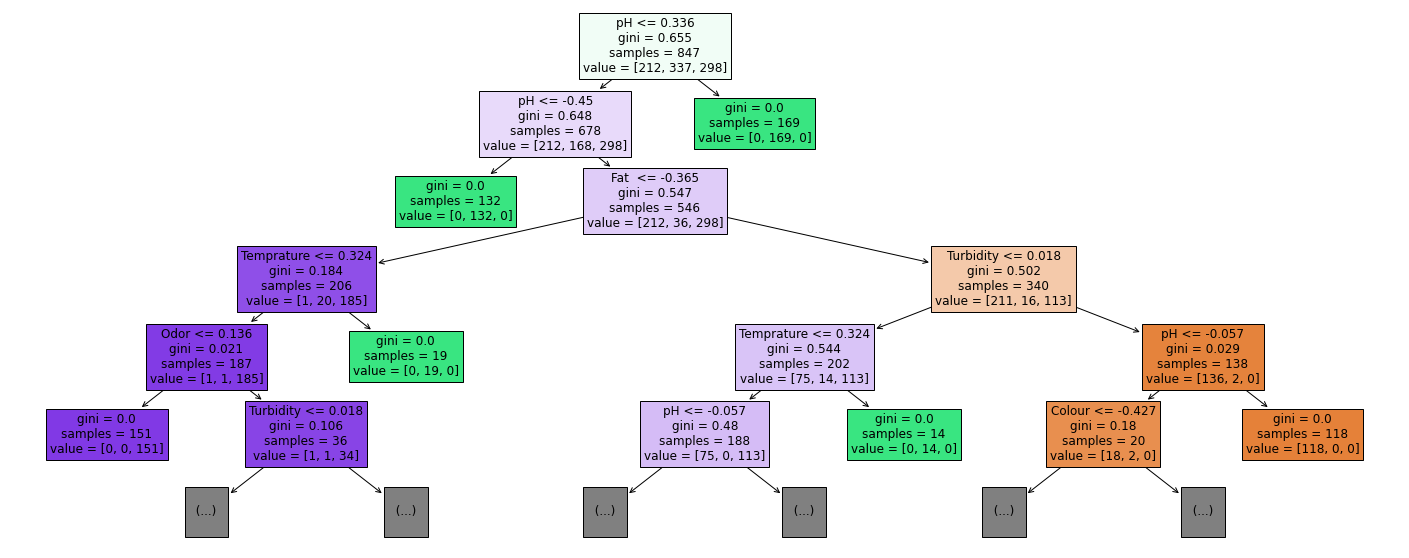

In [49]:
fig,ax=plt.subplots(figsize=(25,10))
chart=tree.plot_tree(dt,max_depth=5,feature_names=x.columns,filled=True,fontsize=12)
plt.savefig('Dt Figure.pdf') ###we can also save as 'Dt Figure.jpg'

In [50]:
dt.score(xtrain,ytrain)

1.0

In [51]:
dt.score(xtest,ytest)

1.0

#### Checking overfitting

#### Pruning Techniques

### Max Depth

In [53]:
for i in range(1,30):
    dt1= DecisionTreeClassifier(max_depth=i)
    dt1.fit(xtrain,ytrain)
    ypred=dt1.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    ac= accuracy_score(ytest,ypred)
    print(f"max dept of {i} is {ac}")


max dept of 1 is 0.5518867924528302
max dept of 2 is 0.7264150943396226
max dept of 3 is 0.7877358490566038
max dept of 4 is 0.8726415094339622
max dept of 5 is 0.910377358490566
max dept of 6 is 0.9198113207547169
max dept of 7 is 0.9811320754716981
max dept of 8 is 0.9811320754716981
max dept of 9 is 0.9858490566037735
max dept of 10 is 1.0
max dept of 11 is 1.0
max dept of 12 is 1.0
max dept of 13 is 1.0
max dept of 14 is 1.0
max dept of 15 is 1.0
max dept of 16 is 1.0
max dept of 17 is 1.0
max dept of 18 is 1.0
max dept of 19 is 1.0
max dept of 20 is 1.0
max dept of 21 is 1.0
max dept of 22 is 1.0
max dept of 23 is 1.0
max dept of 24 is 1.0
max dept of 25 is 1.0
max dept of 26 is 1.0
max dept of 27 is 1.0
max dept of 28 is 1.0
max dept of 29 is 1.0


In [54]:
dt2=DecisionTreeClassifier(max_depth=7)#8
mymodel(dt2)

accuracy_score: 0.9811320754716981
Classification_report :               precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       1.00      1.00      1.00        92
           2       0.96      0.99      0.97        76

    accuracy                           0.98       212
   macro avg       0.98      0.97      0.98       212
weighted avg       0.98      0.98      0.98       212



DecisionTreeClassifier(max_depth=7)

In [55]:
dt2.score(xtrain,ytrain)

0.9704840613931524

In [56]:
dt2.score(xtest,ytest)

0.9811320754716981

#### checking overfitting

### min sample leaf

In [61]:
for i in range(1,90):
    dt3 = DecisionTreeClassifier(min_samples_leaf= i)
    dt3.fit(xtrain,ytrain)
    ypred=dt3.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    print(f"min sample leaf of {i} is {ac}")

min sample leaf of 1 is 1.0
min sample leaf of 2 is 1.0
min sample leaf of 3 is 1.0
min sample leaf of 4 is 0.9952830188679245
min sample leaf of 5 is 0.9952830188679245
min sample leaf of 6 is 0.9952830188679245
min sample leaf of 7 is 0.9952830188679245
min sample leaf of 8 is 0.9952830188679245
min sample leaf of 9 is 0.9952830188679245
min sample leaf of 10 is 0.9952830188679245
min sample leaf of 11 is 0.9952830188679245
min sample leaf of 12 is 0.9858490566037735
min sample leaf of 13 is 0.9858490566037735
min sample leaf of 14 is 0.9858490566037735
min sample leaf of 15 is 0.9528301886792453
min sample leaf of 16 is 0.9481132075471698
min sample leaf of 17 is 0.9481132075471698
min sample leaf of 18 is 0.9481132075471698
min sample leaf of 19 is 0.9481132075471698
min sample leaf of 20 is 0.9292452830188679
min sample leaf of 21 is 0.9245283018867925
min sample leaf of 22 is 0.9245283018867925
min sample leaf of 23 is 0.9245283018867925
min sample leaf of 24 is 0.924528301886792

In [62]:
dt4 = DecisionTreeClassifier(min_samples_leaf= 30)
mymodel(dt4)

accuracy_score: 0.9245283018867925
Classification_report :               precision    recall  f1-score   support

           0       0.98      0.93      0.95        44
           1       0.97      0.90      0.93        92
           2       0.86      0.95      0.90        76

    accuracy                           0.92       212
   macro avg       0.93      0.93      0.93       212
weighted avg       0.93      0.92      0.93       212



DecisionTreeClassifier(min_samples_leaf=30)

#### Rebuilding model with the min_samples_leaf pruning technique and the classification report is printed.

#### i am getting accuracy of 92% by using "min_samples_leaf" purning techniques in DecisionTree

In [63]:
dt4.score(xtrain,ytrain)

0.9279811097992916

In [64]:
dt4.score(xtest,ytest)

0.9245283018867925

#### checking overfitting

### minsample split

In [66]:
for i in range(2,200):
    dt5 = DecisionTreeClassifier(min_samples_split= i)
    dt5.fit(xtrain,ytrain)
    ypred=dt5.predict(xtest)
    ac= accuracy_score(ytest,ypred)
    print(f"min sample leaf of {i} is {ac}")

min sample leaf of 2 is 1.0
min sample leaf of 3 is 1.0
min sample leaf of 4 is 1.0
min sample leaf of 5 is 1.0
min sample leaf of 6 is 1.0
min sample leaf of 7 is 1.0
min sample leaf of 8 is 1.0
min sample leaf of 9 is 1.0
min sample leaf of 10 is 1.0
min sample leaf of 11 is 1.0
min sample leaf of 12 is 1.0
min sample leaf of 13 is 1.0
min sample leaf of 14 is 1.0
min sample leaf of 15 is 1.0
min sample leaf of 16 is 1.0
min sample leaf of 17 is 1.0
min sample leaf of 18 is 1.0
min sample leaf of 19 is 1.0
min sample leaf of 20 is 1.0
min sample leaf of 21 is 0.9952830188679245
min sample leaf of 22 is 0.9952830188679245
min sample leaf of 23 is 0.9952830188679245
min sample leaf of 24 is 0.9952830188679245
min sample leaf of 25 is 0.9952830188679245
min sample leaf of 26 is 0.9952830188679245
min sample leaf of 27 is 0.9858490566037735
min sample leaf of 28 is 0.9858490566037735
min sample leaf of 29 is 0.9858490566037735
min sample leaf of 30 is 0.9858490566037735
min sample leaf o

In [69]:
dt6 = DecisionTreeClassifier(min_samples_split=148 )
mymodel(dt6)

accuracy_score: 0.9198113207547169
Classification_report :               precision    recall  f1-score   support

           0       0.72      1.00      0.84        44
           1       1.00      1.00      1.00        92
           2       1.00      0.78      0.87        76

    accuracy                           0.92       212
   macro avg       0.91      0.93      0.90       212
weighted avg       0.94      0.92      0.92       212



DecisionTreeClassifier(min_samples_split=148)

In [70]:
dt6.score(xtrain,ytrain)

0.9185360094451004

In [71]:
dt6.score(xtest,ytest)

0.9198113207547169

#### In decision Tree "mean_sample_leaf" pruning Tecchinique is giving us the best accuracy of 92% with no overfitting